In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('datasets/banknotes.csv')

In [4]:
data.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


# EDA

0    100
1    100
Name: conterfeit, dtype: int64


<AxesSubplot:xlabel='conterfeit', ylabel='count'>

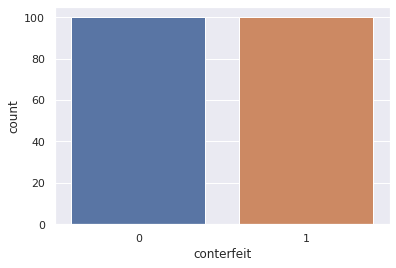

In [7]:
print(data['conterfeit'].value_counts())
sns.countplot(x='conterfeit', data=data)

<AxesSubplot:xlabel='Left', ylabel='Right'>

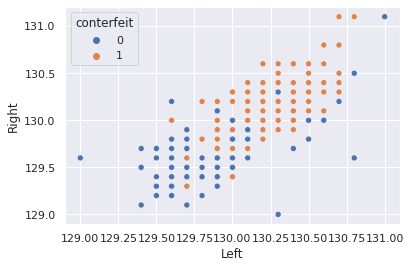

In [10]:
sns.scatterplot(x='Left', y='Right', data=data, hue='conterfeit')

<AxesSubplot:xlabel='Bottom', ylabel='Top'>

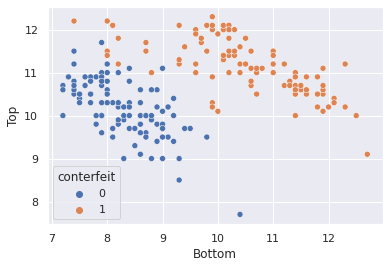

In [11]:
sns.scatterplot(x='Bottom', y='Top', data=data, hue='conterfeit')

In [12]:
data.corr()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
conterfeit,1.000000,-0.194350,0.495666,0.586761,0.772040,0.602420,-0.899179
Length,-0.194350,1.000000,0.231293,0.151763,-0.189801,-0.061321,0.194301
Left,0.495666,0.231293,1.000000,0.743263,0.413781,0.362350,-0.503229
Right,0.586761,0.151763,0.743263,1.000000,0.486758,0.400670,-0.516476
Bottom,0.772040,-0.189801,0.413781,0.486758,1.000000,0.141851,-0.622983
Top,0.602420,-0.061321,0.362350,0.400670,0.141851,1.000000,-0.594045
Diagonal,-0.899179,0.194301,-0.503229,-0.516476,-0.622983,-0.594045,1.000000


<AxesSubplot:>

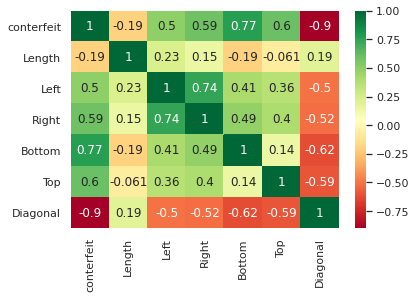

In [14]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [17]:
from sklearn.utils import shuffle
df = shuffle(data)
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
167,1,215.6,130.4,130.1,9.6,11.2,138.6
64,0,215.0,130.0,129.8,8.6,10.6,141.5
10,0,215.3,130.4,130.3,7.9,11.7,141.8
173,1,214.8,129.6,130.0,10.4,11.6,139.2
148,1,214.7,130.2,130.1,10.7,11.0,139.4


In [18]:
X = df.drop(['conterfeit'], axis=1)
y = df['conterfeit']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X.shape)
print(y.shape)

(200, 6)
(200,)


# Model Creation

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = clf_rf.predict(X_test)

Confusion Matrix : 


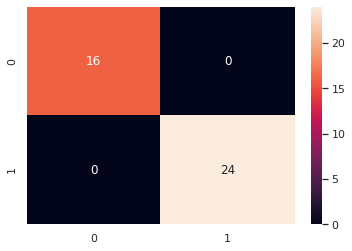

Accuracy Score : 1.0


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
sns.heatmap(cm, annot=True)
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'f1 Score : {f1_score(y_test, y_pred)}')

Precision Score : 1.0
Recall Score : 1.0
f1 Score : 1.0
